<b>ML_GROUP059 | Assignment 9 | ML_GROUP059_A1_Asg9_Q1 </b>
----------------------------------------
<br>The following dataset is used to classify the whether a patient is prone to a chronic kidney disease or not basing on the data provided

<b>Feature Description</b><br>

Independent Features:

Age		-  Numeric         -	age	<br>
Bp		-  Numeric         -	blood pressure<br>
Sg		-  Numeric         -	specific gravity<br>
Al		-  Numeric         -  albumin<br>
Su		-  Numeric         -	sugar<br>
Rbc		-  Categorical     -	red blood cells<br>
Pc		-  Categorical     -	pus cell<br>
Pcc		-  Categorical     -	pus cell clumps<br>
Ba		-  Categorical     -	bacteria<br>
Bgr		-  Numeric         -	blood glucose random<br>
Bu		-  Numeric         -	blood urea<br>
Sc		-  Numeric         -	serum creatinine<br>
Sod		-  Numeric         -	sodium<br>
Pot		-  Numeric         -	potassium<br>
Hemo	-  Numeric         -	hemoglobin<br>
Pcv		-  Numeric         -	packed cell volume<br>
Wc		-  Numeric         -	white blood cell count<br>
Rc		-  Numeric         -	red blood cell count<br>
Htn		-  Categorical     -	hypertension<br>
Dm		-  Categorical     -	diabetes mellitus<br>
Cad		-  Categorical     -	coronary artery disease<br>
Appet	-  Categorical     -	appetite<br>
Pe		-  Categorical     -	pedal edema<br>
Ane		-  Categorical     -	anemia<br>
    
Target Variable:

Class   -  Categorical     -	Classification<br>

In [251]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [252]:
#lets check the current working directory
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'/Users/pkoduri/PK_Data/Trainings/BITS_Mtech/Sem2/Assignments/ML_Asg/A1/1'

In [253]:
file = open('chronic_kidney_disease.arff', 'r')
cpfile = open('ckddata.csv', 'w')  
header = ""
lines=[]
i = 0
j = 0 
for line in file:
    Identifier = line.split(' ')
   
    if(Identifier[0]=='@attribute') :
        if(len(header)>=1):
            header = header + "," + str(Identifier[1]) 
        else:
            header = str(Identifier[1])
           
    elif(line.strip()=='@data'):
        j = i
        header = header.replace("'","")
        cpfile.write(header+"\n")
        lines.append(header+"\n")
        number = len(header.split(','))
        #print(number)
    else:
       
        if(i>j and len(line)>1):
            tempStr=line
            #tempStr=tempStr.strip().rstrip(',')
            lines.append(line)
            number = len(tempStr.split(','))
            
            if(number>25):
                i=1
                #print("diff-",Identifier[0]," i",i," number",number)
            else:
                cpfile.write(line)        
    i+=1    
file.close()
cpfile.close()

<b>Importing</b> data from the provided csv file.<br>

In [254]:
#data = pd.read_csv('Kidney_Disease_Full.csv')
df = pd.read_csv("ckddata.csv",na_values=' ')
df.head()
data=df

In [255]:
# Check data for any null values - Description file claims there are no null values - confirming
data.isnull().sum() 

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [256]:
# Trying to describe the data and see various attributes


print("Reviewing data......",data.head())

print("\n\n\nShape of data...",data.shape)

print("\n\n\nDescribing different numeric attributes...",data.describe().T)

print("\n\n\nUnderstanding different attributes types...\n\n")
print(data.info())

Reviewing data......   age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   

  pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  38  6000    ?   no   no  no  good   no   no   ckd  
2  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  35  7300  4.6   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]



Shape of data... (344, 25)



Describing different numeric attributes...       count unique         top freq
age     344     75          60   18
bp      3

#### Null Handling 
This shows that many attributes have few missing values stamped with a ?   

Lets find the appropriate measure for each of the attribute type and fill them <br>
So that we don't loose valuable informaiton from other features in that tuple

In [257]:
#Replace any '?' in data with NAN values
data = data.apply(lambda x: x.str.strip()).replace('?', np.nan)

In [258]:
data.isnull().sum() 

age        8
bp        11
sg        43
al        42
su        44
rbc      134
pc        59
pcc        4
ba         4
bgr       40
bu        18
sc        17
sod       79
pot       80
hemo      46
pcv       62
wbcc      96
rbcc     120
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [259]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,336,333,301,302,300,210,285,340,340,304,...,282,248,224,342,342,342,343,343,343,344
unique,74,10,5,6,6,2,2,2,2,139,...,41,84,48,2,2,2,2,2,2,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,99,...,41,9800,4.5,no,no,no,good,no,no,ckd
freq,18,96,93,166,246,168,217,302,321,9,...,21,10,15,214,223,312,269,277,287,222


#### EDA - Data Visualization 
Data Distrubution (Feature wise spread) to get an insight about different features and find any Outlier 


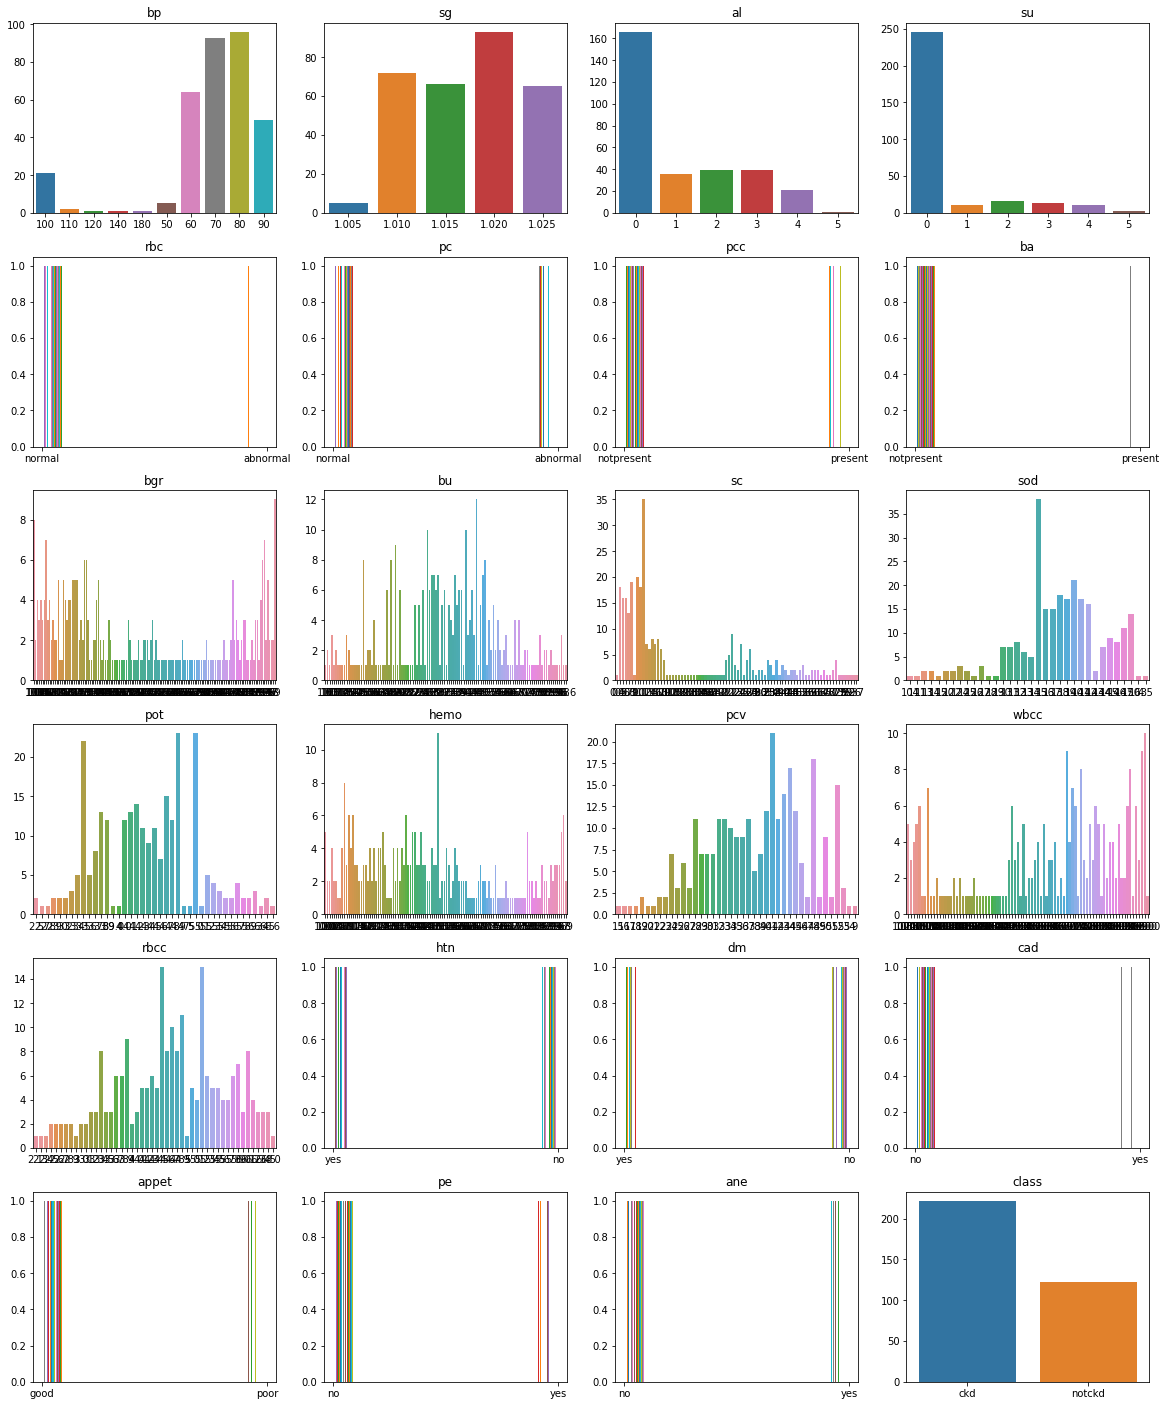

In [209]:
"""Plotting all the attributes to get a visualization of the 
   intra-column data  split
"""
#data.columns[1:]
graphRow, graphCol = 0, 0
catch,dims = plt.subplots(6, 4, figsize = (20, 25))
plt.subplots_adjust(hspace = .23)

for att in data.columns[1:]:
    if att in ['rbc','pc', 'pcc', 'ba','htn','dm','cad','appet','pe','ane']:
       dims[graphRow,graphCol].hist(data[att].dropna())
                
    else:
        bar_data = data[att].value_counts()
        sb.barplot(bar_data.index, bar_data.values, ax = dims[graphRow,graphCol])
    dims[graphRow, graphCol].set_title(att)
    graphCol += 1 
    if graphCol ==4:
        graphRow += 1
        graphCol = 0

#### Lets understand the impact of each variable on the Target variable

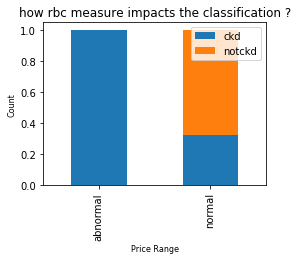

In [260]:
#how rbc measure impacts the classification
var = pd.crosstab(data['rbc'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how rbc measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

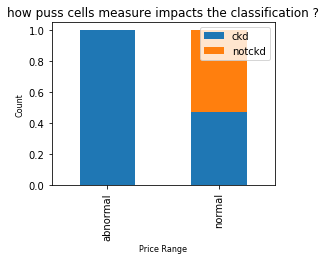

In [261]:
#how puss cells measure impacts the classification
var = pd.crosstab(data['pc'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how puss cells measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

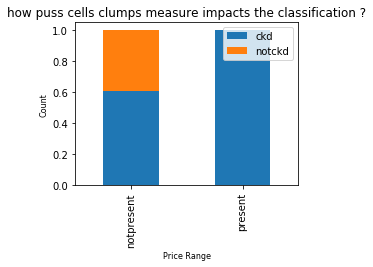

In [262]:
#how puss cells clumps measure impacts the classification
var = pd.crosstab(data['pcc'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how puss cells clumps measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

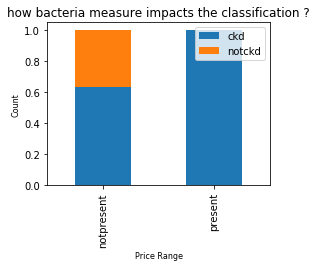

In [263]:
#how bacteria measure impacts the classification
var = pd.crosstab(data['ba'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how bacteria measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

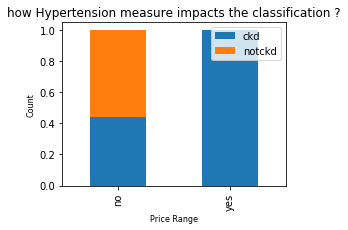

In [264]:
#how Hypertension measure impacts the classification
var = pd.crosstab(data['htn'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how Hypertension measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

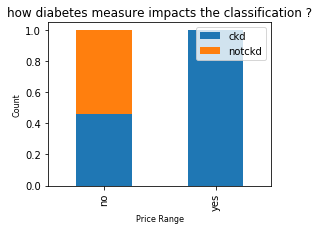

In [265]:
#how diabetes measure impacts the classification
var = pd.crosstab(data['dm'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how diabetes measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

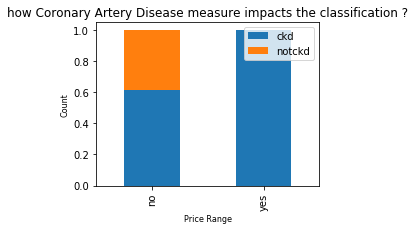

In [266]:
#how Coronary Artery measure impacts the classification
var = pd.crosstab(data['cad'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how Coronary Artery Disease measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

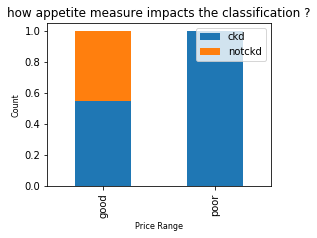

In [267]:
#how appetite  measure impacts the classification
var = pd.crosstab(data['appet'], data['class'])
var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))

plt.title('how appetite measure impacts the classification ?', fontsize = 12)
plt.xlabel('Price Range', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.legend()
plt.show()

In [268]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

<B>Feature Processing / Cleaning - Based on EDA above </B>

In [269]:
#Numeric attributes  - Handling missing values

data['age'] = pd.to_numeric(data['age'])
data['age'].fillna(data['age'].mean(), inplace=True)

data['bp'] = pd.to_numeric(data['bp'])
data['bp'].fillna(data['bp'].mean(), inplace=True)

data['sg'] = pd.to_numeric(data['sg'])
data['sg'].fillna(data['sg'].mean(), inplace=True)

data['al'] = pd.to_numeric(data['al'])
data['al'].fillna(data['al'].mean(), inplace=True)

data['su'] = pd.to_numeric(data['su'])
data['su'].fillna(data['su'].mean(), inplace=True)

data['bgr'] = pd.to_numeric(data['bgr'])
data['bgr'].fillna(data['bgr'].mean(), inplace=True)

data['bu'] = pd.to_numeric(data['bu'])
data['bu'].fillna(data['bu'].mean(), inplace=True)

data['sc'] = pd.to_numeric(data['sc'])
data['sc'].fillna(data['sc'].mean(), inplace=True)

data['sod'] = pd.to_numeric(data['sod'])
data['sod'].fillna(data['sod'].mean(), inplace=True)

data['pot'] = pd.to_numeric(data['pot'])
data['pot'].fillna(data['pot'].mean(), inplace=True)

data['hemo'] = pd.to_numeric(data['hemo'])
data['hemo'].fillna(data['hemo'].mean(), inplace=True)

data['pcv'] = pd.to_numeric(data['pcv'])
data['pcv'].fillna(data['pcv'].mean(), inplace=True)

data['wbcc'] = pd.to_numeric(data['wbcc'])
data['wbcc'].fillna(data['wbcc'].mean(), inplace=True)

data['rbcc'] = pd.to_numeric(data['rbcc'])
data['rbcc'].fillna(data['rbcc'].mean(), inplace=True)

In [270]:
#Categorical variables

data['rbc'].fillna(data['rbc'].mode()[0], inplace=True)
data['rbc']= data['rbc'].astype('category')
data['rbc'] = data['rbc'].cat.codes

data['pc'].fillna(data['pc'].mode()[0], inplace=True)
data['pc']= data['pc'].astype('category')
data['pc'] = data['pc'].cat.codes


data['pcc'].fillna(data['pcc'].mode()[0], inplace=True)
data['pcc']= data['pcc'].astype('category')
data['pcc'] = data['pcc'].cat.codes

data['ba'].fillna(data['ba'].mode()[0], inplace=True)
data['ba']= data['ba'].astype('category')
data['ba'] = data['ba'].cat.codes

data['htn'].fillna(data['htn'].mode()[0], inplace=True)
data['htn']= data['htn'].astype('category')
data['htn'] = data['htn'].cat.codes

data['dm'].fillna(data['dm'].mode()[0], inplace=True)
data['dm']= data['dm'].astype('category')
data['dm'] = data['dm'].cat.codes

data['cad'].fillna(data['cad'].mode()[0], inplace=True)
data['cad']= data['cad'].astype('category')
data['cad'] = data['cad'].cat.codes

data['appet'].fillna(data['appet'].mode()[0], inplace=True)
data['appet']= data['appet'].astype('category')
data['appet'] = data['appet'].cat.codes

data['pe'].fillna(data['pe'].mode()[0], inplace=True)
data['pe']= data['pe'].astype('category')
data['pe'] = data['pe'].cat.codes

data['ane'].fillna(data['ane'].mode()[0], inplace=True)
data['ane']= data['ane'].astype('category')
data['ane'] = data['ane'].cat.codes

In [271]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.786184,...,38.0,6000.0,4.657143,0,0,0,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.657143,0,1,0,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,ckd


In [272]:
data.isnull().sum() 

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [273]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [274]:
#standardizing the target variable
print(data['class'].unique())
data['class']=data['class'].replace("ckd\t","ckd") 
print(data['class'].unique())
data['class']=[1 if each=="ckd" else 0 for each in data['class']]

['ckd' 'notckd']
['ckd' 'notckd']


In [275]:
#df=data.dropna(axis=0)
#print(data.shape)
#print(df.shape) 
#df.head()

In [276]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.786184,...,38.0,6000.0,4.657143,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.657143,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,1


In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 25 columns):
age      344 non-null float64
bp       344 non-null float64
sg       344 non-null float64
al       344 non-null float64
su       344 non-null float64
rbc      344 non-null int8
pc       344 non-null int8
pcc      344 non-null int8
ba       344 non-null int8
bgr      344 non-null float64
bu       344 non-null float64
sc       344 non-null float64
sod      344 non-null float64
pot      344 non-null float64
hemo     344 non-null float64
pcv      344 non-null float64
wbcc     344 non-null float64
rbcc     344 non-null float64
htn      344 non-null int8
dm       344 non-null int8
cad      344 non-null int8
appet    344 non-null int8
pe       344 non-null int8
ane      344 non-null int8
class    344 non-null int64
dtypes: float64(14), int64(1), int8(10)
memory usage: 43.8 KB


<b>Correlation</b>: Understanding the correlation between different attibutes

In [278]:
data.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.154086,-0.188531,0.130136,0.245465,-0.015367,-0.103284,0.155855,0.040492,0.244380,...,-0.245030,0.109773,-0.223513,0.430905,0.401998,0.242084,0.175115,0.099471,0.088544,0.276396
bp,0.154086,1.000000,-0.154239,0.113630,0.200710,-0.132941,-0.130108,0.030790,0.108773,0.119091,...,-0.284122,0.039519,-0.237115,0.244286,0.227973,0.065142,0.185092,0.043654,0.197835,0.282456
sg,-0.188531,-0.154239,1.000000,-0.430138,-0.288222,0.225660,0.315642,-0.272142,-0.192786,-0.312566,...,0.509102,-0.195014,0.434025,-0.314618,-0.332822,-0.120800,-0.226310,-0.248265,-0.219114,-0.672683
al,0.130136,0.113630,-0.430138,1.000000,0.275183,-0.342950,-0.518039,0.396092,0.356177,0.319902,...,-0.529549,0.209972,-0.447408,0.479153,0.374722,0.222618,0.338438,0.441642,0.286069,0.587835
su,0.245465,0.200710,-0.288222,0.275183,1.000000,-0.070084,-0.170962,0.134164,0.110294,0.648651,...,-0.232605,0.165462,-0.208533,0.301194,0.485698,0.242791,0.080177,0.142149,0.080737,0.319294
rbc,-0.015367,-0.132941,0.225660,-0.342950,-0.070084,1.000000,0.349991,-0.095187,-0.181920,-0.153875,...,0.270734,-0.007571,0.195832,-0.135422,-0.158124,-0.105024,-0.172117,-0.201634,-0.100121,-0.276455
pc,-0.103284,-0.130108,0.315642,-0.518039,-0.170962,0.349991,1.000000,-0.500381,-0.327347,-0.285588,...,0.391802,-0.159808,0.365453,-0.267260,-0.191463,-0.157035,-0.273077,-0.351353,-0.255662,-0.367962
pcc,0.155855,0.030790,-0.272142,0.396092,0.134164,-0.095187,-0.500381,1.000000,0.280162,0.192089,...,-0.294808,0.198144,-0.271959,0.169993,0.133637,0.154024,0.176614,0.110909,0.196285,0.261237
ba,0.040492,0.108773,-0.192786,0.356177,0.110294,-0.181920,-0.327347,0.280162,1.000000,0.065880,...,-0.199755,0.129763,-0.181752,0.077145,0.064939,0.105680,0.183120,0.140734,0.065735,0.179241
bgr,0.244380,0.119091,-0.312566,0.319902,0.648651,-0.153875,-0.285588,0.192089,0.065880,1.000000,...,-0.269525,0.119359,-0.215148,0.370361,0.489738,0.190225,0.191591,0.135593,0.154592,0.380454


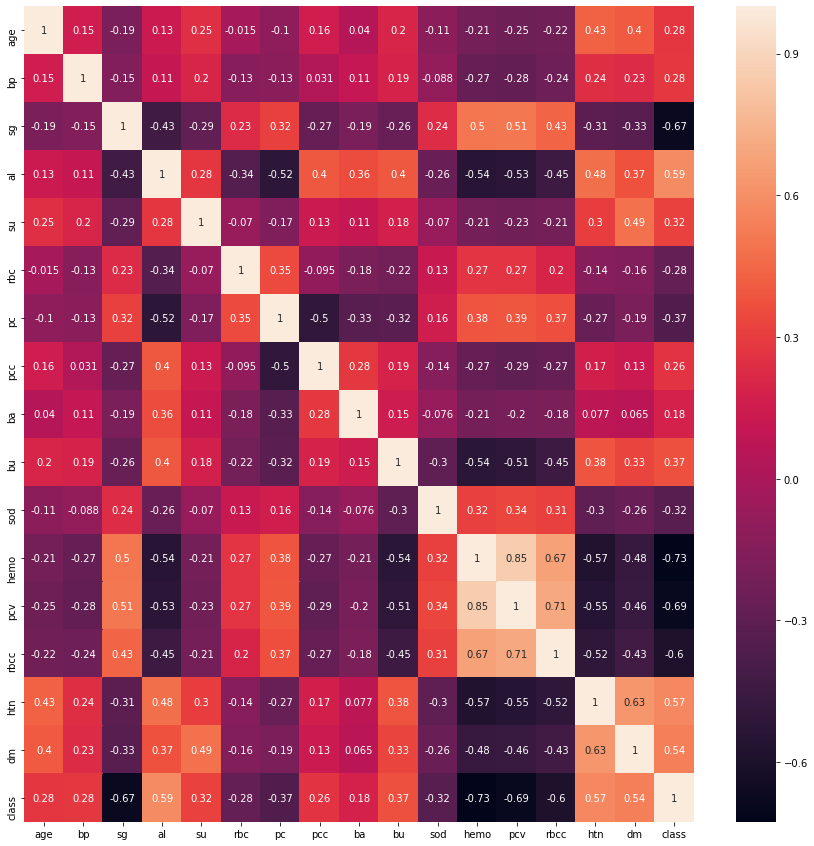

In [299]:
plt.figure(figsize = (15,15))        # Size of the figure

sns.heatmap(data.corr(),annot = True)

In [231]:
data.corr()['ane']

age      0.088544
bp       0.197835
sg      -0.219114
al       0.286069
su       0.080737
rbc     -0.100121
pc      -0.255662
pcc      0.196285
ba       0.065735
bgr      0.154592
bu       0.441247
sc       0.222280
sod     -0.187225
pot      0.098562
hemo    -0.562752
pcv     -0.524845
wbcc     0.050266
rbcc    -0.413179
htn      0.361045
dm       0.225597
cad      0.059063
appet    0.267395
pe       0.185092
ane      1.000000
class    0.326890
Name: ane, dtype: float64

#### Notes: Correlation analysis
Here are some of the correlated features (either Positively / negatively)
One among them can be removed to reduce the dimensions.
At the same time ensure ther impact on target variable is not much<br><br>


pcv (packed cell volume) and Hemo (hemoglobin) and rbcc (red blood cell count) and ane (anemia) and al (Albumin)<br>
htn (hypertension) and dm (diabetes mellitus)<br>
su (sugar) and bgr(blood glucose random)<br>
so (sodium) and sc(serum creatinine)<br>

In [280]:
# Can definitely be removed

data = data.drop(['bgr'],axis=1)
data = data.drop(['sc'],axis=1)
data = data.drop(['pot'],axis=1)
data = data.drop(['ane'],axis=1)
data = data.drop(['wbcc'],axis=1)
data = data.drop(['cad'],axis=1)
data = data.drop(['appet'],axis=1)
data = data.drop(['pe'],axis=1)

# More impact on target variable - hence holding them
#data = data.drop(['rbcc'],axis=1)
#data = data.drop(['al'],axis=1)
#data = data.drop(['dm'],axis=1)

<b>Note:</b> We can see that almost all features are more less contributing equally to the target variable.
    So it may not be a good idea to ignore any feature.

<b>Training the model:</b>

i.  First let's separate the Independent and Dependent variables <br>
ii. Then Split the data to Train and Test sets<br>
iii.Fit different models<br>
iv. Try cross Validations<br>
v.  View results and preformance metrics

In [281]:
y=data["class"]
x=data.drop(["class"],axis=1)

In [282]:
# Feature Scaling
#Standardize features by removing the mean(=0) and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

#x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [283]:
# Variables to hold algorithm names and its successes.
score=[] 
algorithms=[] 

In [284]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#### KNeighborsClassifier

KNN accuracy = 96.15384615384616
KNN confusion Matrix  
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.98      0.96      0.97        68

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



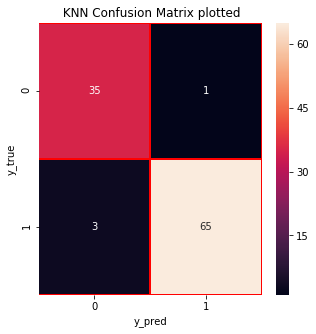

In [285]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
print("KNN confusion Matrix  ")
print(classification_report(y_test,y_pred))
plt.title(" KNN Confusion Matrix plotted")
plt.show()

#### KNeighborsClassifier - Cross Validation

In [286]:
knn_cv_r10_scores = cross_val_score(knn, x, y, cv=10)
print(knn_cv_r10_scores)
print("KNN Mean 10-Fold R Squared: {}".format(np.mean(knn_cv_r10_scores)))

[1.         0.97222222 1.         0.91176471 1.         0.97058824
 0.94117647 0.97058824 0.91176471 0.97058824]
KNN Mean 10-Fold R Squared: 0.9648692810457516


In [287]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((240, 16), (240,), (104, 16), (104,))

#### Navie-Bayes

Navie Bayes accuracy = 88.46153846153845
Navie Bayes Confusion Matrix  
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        36
           1       1.00      0.82      0.90        68

    accuracy                           0.88       104
   macro avg       0.88      0.91      0.88       104
weighted avg       0.91      0.88      0.89       104



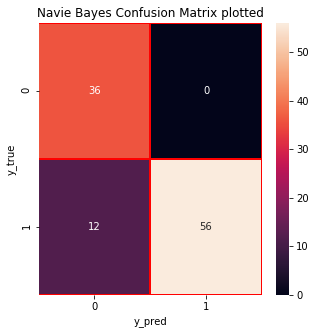

In [288]:
#Navie-Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
print("Navie Bayes Confusion Matrix  ")
print(classification_report(y_test,y_pred))
plt.title("Navie Bayes Confusion Matrix plotted")
plt.show()

#### Navie-Bayes - Cross Validation

In [289]:
gnb_cv_r10_scores = cross_val_score(nb, x, y, cv=10)
print(gnb_cv_r10_scores)
print("GNB Mean 10-Fold R Squared: {}".format(np.mean(gnb_cv_r10_scores)))

[0.91666667 0.94444444 0.91176471 0.88235294 0.91176471 1.
 0.91176471 0.88235294 0.82352941 0.97058824]
GNB Mean 10-Fold R Squared: 0.9155228758169935


#### Random Forest Classifier - Cross Validation

Random Forest accuracy = 0.9807692307692307
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.97      1.00      0.99        68

    accuracy                           0.98       104
   macro avg       0.99      0.97      0.98       104
weighted avg       0.98      0.98      0.98       104



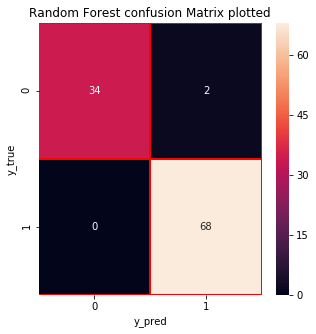

In [290]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
print(classification_report(y_test,y_pred))
plt.title("Random Forest confusion Matrix plotted")
plt.show()

#### Random Forest Classifier - Cross Validation

In [291]:
rf_cv_r10_scores = cross_val_score(rf, x, y, cv=10)
print(rf_cv_r10_scores)
print("Random Forest Mean 10-Fold R Squared: {}".format(np.mean(rf_cv_r10_scores)))

[1.         0.97222222 1.         1.         1.         0.97058824
 1.         1.         1.         1.        ]
Random Forest Mean 10-Fold R Squared: 0.9942810457516341


#### LogisticRegression Classifier

test accuracy 0.9807692307692307
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.99        68

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



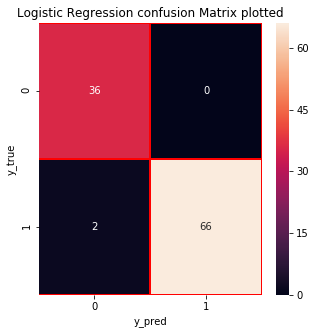

In [292]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
print(classification_report(y_test,y_pred))
plt.title("Logistic Regression confusion Matrix plotted")
plt.show()

#### LogisticRegression Classifier - Cross Validation

In [293]:
lr_cv_r10_scores = cross_val_score(lr, x, y, cv=10)
print(lr_cv_r10_scores)
print("Logistic Regression  Mean 10-Fold R Squared: {}".format(np.mean(lr_cv_r10_scores)))

[1.         0.97222222 1.         0.91176471 1.         1.
 0.97058824 1.         0.97058824 0.94117647]
Logistic Regression  Mean 10-Fold R Squared: 0.9766339869281045


#### Printing coefficients and Intercept of regression

In [294]:
coefficients = pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
print('Logistic regression coefficients for each feature .....')
print(coefficients)

Logistic regression coefficients for each feature .....
        0         0
0     age -0.163019
1      bp  0.352990
2      sg -1.647155
3      al  0.807575
4      su  0.161819
5     rbc -0.433325
6      pc -0.474676
7     pcc -0.219311
8      ba -0.030151
9     bgr -0.005604
10     bu -0.630023
11     sc -1.393263
12    sod -1.001398
13    pot -0.685633
14   hemo  0.692770
15    pcv  0.590779
16   wbcc       NaN
17   rbcc       NaN
18    htn       NaN
19     dm       NaN
20    cad       NaN
21  appet       NaN
22     pe       NaN
23    ane       NaN
24  class       NaN


In [295]:
print('Logistic regression intercept is .....',lr.intercept_)

Logistic regression intercept is ..... [2.77064167]


### Regression equation

Equation : y=B0+B1x
            =B0+B1X1+...+BnXn for all features

    B1 - Weight matrix for all features
    B0 - Intercept

B1  equals zero 
There is no relationship between predictor and target variabels

B0  is not equal to zero
There is a relationship between predictor and target variabels

In our case 
##### y_pred =  2.73000102 + coefficients.T * x_test

### Decision Boundary

In [296]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(x_train[:,[2,3]],y_train)
score.append(lr1.score(x_test[:,[2,3]],y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr1.score(x_test[:,[2,3]],y_test)))

test accuracy 0.9326923076923077


(-1.826848670054177, 3.2931513299458275)

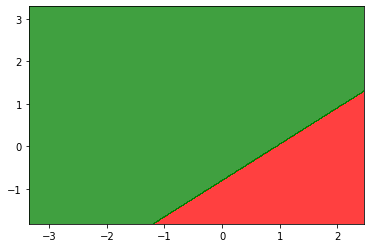

In [297]:
#visualizing decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = x_train[:,[2,3]], y_train[:]
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


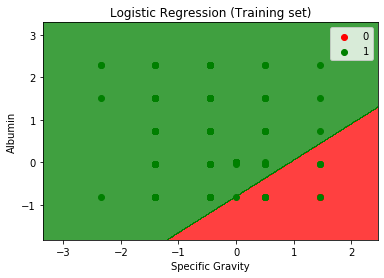

In [298]:
#visualizing decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = x_train[:,[2,3]], y_train[:]
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Specific Gravity')
plt.ylabel('Albumin')
plt.legend()
plt.show()